In [80]:
                         ######not finish yet****************$$$$$$$$$$$$$$$$$$
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sparse

In [81]:
data = pd.read_csv('econ.csv')
data.head()

,Period,ConsConf,CompLead,BusConf,Emp,InvToSales,PMI,SP500,MfgOrdDur,BldgPerm,Sales,FedFunds,DJI,Payroll,PersCons
0,2007-01,100.8497,101.4669,99.40803,72.11646,1.31,49.5,1424.16,217697,1626,327125,5.25,12621.69,135335,9553.1
1,2007-02,100.6274,101.5683,99.51553,71.97358,1.30,51.9,1444.80,222033,1598,328076,5.26,12268.63,136026,9590.8
2,2007-03,100.3566,101.6771,99.64309,71.99528,1.28,50.7,1406.95,228802,1596,330800,5.26,12354.35,136922,9631.6
3,2007-04,100.1832,101.7829,99.82444,71.70923,1.28,52.6,1463.64,231816,1470,329653,5.25,13062.91,137730,9670.6
4,2007-05,100.1231,101.8653,99.93272,71.76241,1.28,52.5,1511.14,227263,1493,334135,5.25,13627.64,138673,9708.9


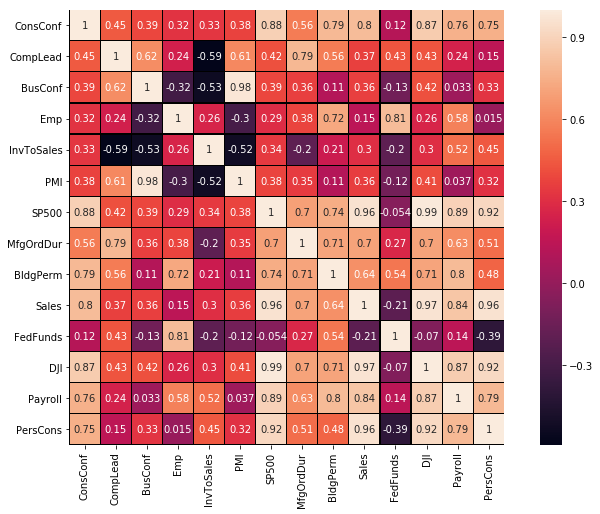

In [82]:
    corr=data.corr()
    plt.figure(figsize=(13,8))
    sns.heatmap( data.corr(),linewidths=0.1,vmax=1.0,square=True,linecolor='black',annot=True)

In [83]:
new_data=data.drop(['Period', 'CompLead', 'BusConf','Emp','InvToSales','PMI','MfgOrdDur'
                    ,'BldgPerm','FedFunds'], axis=1)
new_data.head()

,ConsConf,SP500,Sales,DJI,Payroll,PersCons
0,100.8497,1424.16,327125,12621.69,135335,9553.1
1,100.6274,1444.80,328076,12268.63,136026,9590.8
2,100.3566,1406.95,330800,12354.35,136922,9631.6
3,100.1832,1463.64,329653,13062.91,137730,9670.6
4,100.1231,1511.14,334135,13627.64,138673,9708.9


In [84]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 6 columns):
ConsConf    129 non-null float64
SP500       129 non-null float64
Sales       129 non-null int64
DJI         129 non-null float64
Payroll     129 non-null int64
PersCons    129 non-null float64
dtypes: float64(4), int64(2)
memory usage: 6.1 KB


In [85]:
type(new_data)

pandas.core.frame.DataFrame

In [86]:
new_data.shape

(129, 6)

In [87]:
new_data.columns

Index(['ConsConf', 'SP500', 'Sales', 'DJI', 'Payroll', 'PersCons'], dtype='object')

In [88]:
new_data.iloc[30:40,2:3]

,Sales
30,302514
31,309012
32,300953
33,304078
34,306799
35,308518
36,308751
37,308568
38,316150
39,318437


In [89]:
new_data.tail()

,ConsConf,SP500,Sales,DJI,Payroll,PersCons
124,101.1434,2388.33,418381,21008.65,146784,13310.3
125,101.0280,2430.06,418025,21349.63,147421,13329.1
126,100.9738,2431.39,420258,21891.12,146288,13377.7
127,101.0689,2477.10,419882,21948.10,146587,13395.2
128,101.2420,2474.42,428747,22405.09,146964,13531.2


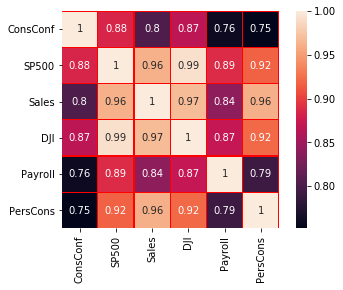

In [90]:
    corr=new_data.corr()
    sns.heatmap( new_data.corr(),linewidths=0.2,vmax=1.0,square=True,linecolor='red',annot=True)

In [102]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 6 columns):
ConsConf    129 non-null float64
SP500       129 non-null float64
Sales       129 non-null int64
DJI         129 non-null float64
Payroll     129 non-null int64
PersCons    129 non-null float64
dtypes: float64(4), int64(2)
memory usage: 6.1 KB


In [92]:
new_data.head()

,ConsConf,SP500,Sales,DJI,Payroll,PersCons
0,100.8497,1424.16,327125,12621.69,135335,9553.1
1,100.6274,1444.80,328076,12268.63,136026,9590.8
2,100.3566,1406.95,330800,12354.35,136922,9631.6
3,100.1832,1463.64,329653,13062.91,137730,9670.6
4,100.1231,1511.14,334135,13627.64,138673,9708.9


In [93]:
#knn classification
X = new_data.iloc[:,1: ].values
y = new_data.iloc[:, 0].values

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [99]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [100]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)


ValueError: Unknown label type: 'continuous'